## Overview
In data analysis, we might need to split the dataset into groups/pivot tables and apply a function to each group, whether it is an aggrgation or transformation operation. For this purpose, pandas has some flexible built-in functionalities.

## GroupBy mechanics
split-apply-combine process

First, the data contained in a pandas object is spit into groups using one or more keys. The pandas object can be grouped on its rows(axis=0) or its columns(axis=1).

Next, a function is applied to each of the groups, producing a new value.

Finally, the results of that is combined into a result object.

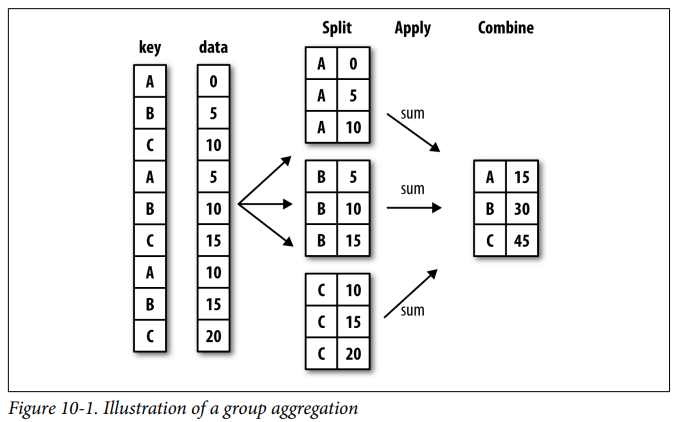

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.614096,-1.191201
1,a,two,-0.014992,0.489264
2,b,one,-1.300789,1.191449
3,b,two,-0.471185,0.890057
4,a,one,-0.260908,-2.175065


Suppose we want to compute the mean of data1 columns using the labels from key1

In [7]:
grouped = df['data1'].groupby(df['key1'])
grouped

As we can see the returned object is a 'groupby' object. This object has all the information required to appy some operation to each of the groups. Here, we want to apply the mean operation.

In [8]:
grouped.mean()

key1
a    0.446065
b   -0.885987
Name: data1, dtype: float64

We can also pass an array of keys to be  grouped by.

In [10]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.676594
      two    -0.014992
b     one    -1.300789
      two    -0.471185
Name: data1, dtype: float64

In [11]:
means.unstack()

key2,one,two
key1,,
a,0.676594,-0.014992
b,-1.300789,-0.471185


The group keys could also be just arrays if they are the right lenght.

In [15]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2005, 2006, 2007])
df['data1'].groupby([states, years]).mean()

California  2005   -0.657890
Ohio        2005    1.614096
            2006   -0.471185
            2007   -0.260908
Name: data1, dtype: float64

We can also just pass the the column names as the group keys

In [16]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.446065,-0.959001
b,-0.885987,1.040753


In [17]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.676594 -1.683133
     two  -0.014992  0.489264
b    one  -1.300789  1.191449
     two  -0.471185  0.890057

Non-numeric data columns are said to be nuisance columns which are excluded. All numeric columns are aggregated by default.

The size() used to return the size of each group.

In [18]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating Over Groups
The groupby object allows for iteration over it, generating a 2-tuple contianing the group name followed by the group data.

In [20]:
for name, group in df.groupby('key1'):
    print("The group name is: ", name)
    print(group)

The group name is:  a
  key1 key2     data1     data2
0    a  one  1.614096 -1.191201
1    a  two -0.014992  0.489264
4    a  one -0.260908 -2.175065
The group name is:  b
  key1 key2     data1     data2
2    b  one -1.300789  1.191449
3    b  two -0.471185  0.890057


In case of multiple keys, the first element is a tuple of key values.

In [21]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.614096 -1.191201
4    a  one -0.260908 -2.175065
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.014992  0.489264
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.300789  1.191449
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.471185  0.890057


Another useful way is computing a dictionary of the data.

In [22]:
pieces = list(df.groupby('key1'))
pieces

[('a',
    key1 key2     data1     data2
  0    a  one  1.614096 -1.191201
  1    a  two -0.014992  0.489264
  4    a  one -0.260908 -2.175065),
 ('b',
    key1 key2     data1     data2
  2    b  one -1.300789  1.191449
  3    b  two -0.471185  0.890057)]

In [23]:
pieces = dict(pieces)
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.300789,1.191449
3,b,two,-0.471185,0.890057


We are grouping the columns by dtype below.

In [24]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [25]:
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  1.614096 -1.191201
1 -0.014992  0.489264
2 -1.300789  1.191449
3 -0.471185  0.890057
4 -0.260908 -2.175065
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a column or Subset of columns

In [ ]:
df.groupby('key1')['data1']
df.groupby('key2')[['data2']]

The above is a better form of the one below;

In [ ]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

For example to compute the mean values for the data2 column,

In [31]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -1.683133
     two   0.489264
b    one   1.191449
     two   0.890057

The object returned above is a grouped dataframe if a list or array is passed.

In [32]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one    -1.683133
      two     0.489264
b     one     1.191449
      two     0.890057
Name: data2, dtype: float64

Note the significant diffence between the above two. If a scalar is passed the returned object is a grouped Series. 

### Grouping with Dicts and Series

In [36]:
people = pd.DataFrame(np.random.randn(5, 5),
                     columns=['a', 'b', 'c', 'd', 'e'],
                     index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # we are adding some null values
people

,a,b,c,d,e
Joe,0.886064,0.191012,1.813110,-0.471120,-0.689935
Steve,-1.343873,0.787150,-0.042913,-0.413099,-0.659957
Wes,-0.492796,NaN,NaN,0.923054,1.279802
Jim,-0.357104,1.462357,0.094828,-1.560865,-0.282344
Travis,0.201303,0.534155,-0.384957,-0.499509,0.050036


Suppose we have a group correspondance to map using,

In [39]:
mapping = {'a' : 'red', 'b': 'red', 'c' : 'blue',
          'd' : 'blue', 'e' : 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,1.341990,0.387140
Steve,-0.456013,-1.216680
Wes,0.923054,0.787006
Jim,-1.466037,0.822909
Travis,-0.884466,0.785495


Same functionality is there for a series also.

In [40]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [42]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with Functions
This is a more generic way of grouping. The function passed as the group key will be called once per index value, with the return values being used as group names.

In [43]:
people

,a,b,c,d,e
Joe,0.886064,0.191012,1.813110,-0.471120,-0.689935
Steve,-1.343873,0.787150,-0.042913,-0.413099,-0.659957
Wes,-0.492796,NaN,NaN,0.923054,1.279802
Jim,-0.357104,1.462357,0.094828,-1.560865,-0.282344
Travis,0.201303,0.534155,-0.384957,-0.499509,0.050036


In [44]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.036164,1.653370,1.907938,-1.108931,0.307522
5,-1.343873,0.787150,-0.042913,-0.413099,-0.659957
6,0.201303,0.534155,-0.384957,-0.499509,0.050036


In the above, the len function finds the length of the names in the index columns and groups accordingly.

In [45]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.492796  0.191012  1.813110 -0.471120 -0.689935
  two -0.357104  1.462357  0.094828 -1.560865 -0.282344
5 one -1.343873  0.787150 -0.042913 -0.413099 -0.659957
6 two  0.201303  0.534155 -0.384957 -0.499509  0.050036

### Grouping by Index levels
We can aggregate using one of the levels of an axis index.

In [46]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                   names=['city', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0     -1.574640 -1.262758 -1.348474 -1.094183 -0.236348
1      0.441358 -2.582573 -1.034148  0.415254 -0.805937
2     -0.158002  2.001027 -0.128693 -0.473450 -0.811762
3      0.600171  0.297758  1.025176 -0.058206  0.624127

In [49]:
hier_df.groupby(level='city', axis=1).count()

city,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Data Aggregation
Aggregations refer to any data transforamtions that produce scalar values from arrays.

We can use aggregations of our own or call any method that is defind on the object to be grouped.

In [50]:
df

,key1,key2,data1,data2
0,a,one,1.614096,-1.191201
1,a,two,-0.014992,0.489264
2,b,one,-1.300789,1.191449
3,b,two,-0.471185,0.890057
4,a,one,-0.260908,-2.175065


In [51]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.288278
b   -0.554145
Name: data1, dtype: float64

Creating our own aggregation functions;

In [52]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [56]:
grouped.agg(peak_to_peak)

C:\Users\Visakan\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,data1,data2
key1,,
a,1.875004,2.664329
b,0.829604,0.301392


In [57]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.446065  1.018990 -0.260908 -0.137950 -0.014992  0.799552   
b      2.0 -0.885987  0.586619 -1.300789 -1.093388 -0.885987 -0.678586   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.614096   3.0 -0.959001  1.347257 -2.175065 -1.683133 -1.191201   
b    -0.471185   2.0  1.040753  0.213116  0.890057  0.965405  1.040753   

                          
           75%       max  
key1                      
a    -0.350969  0.489264  
b     1.116101  1.191449

### Column-Wise and Multiple Function Application
Sometimes we may need to aggregate using a different function depending on the column or multiple functions at once.

In [58]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


First, we group the tips by day and smoker.

In [63]:
grouped = tips.groupby(['day', 'smoker'])
grouped.agg('count')

total_bill  tip  sex  time  size  tip_pct
day  smoker                                           
Fri  No               4    4    4     4     4        4
     Yes             15   15   15    15    15       15
Sat  No              45   45   45    45    45       45
     Yes             42   42   42    42    42       42
Sun  No              57   57   57    57    57       57
     Yes             19   19   19    19    19       19
Thur No              45   45   45    45    45       45
     Yes             17   17   17    17    17       17

In [65]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

Passing a list of functions, we get a Dataframe object as return unlike a Series object as seen above.

In [66]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

Instead of using the functions names like mean, std, etc... we can also give our own names in the format(name, function),

In [67]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [70]:
functions = ['count', 'mean', 'max']
result = grouped[['tip_pct', 'total_bill']].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [71]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [72]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

Suppose we want to apply potentially different functions to one or more columns, then we pass a dictionary;

In [73]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [74]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Returning aggregated data without row indexes
So far, the aggregated data comes back with an index. This can be disabled by passing as_index=False.

In [75]:
tips.groupby(['day', 'smoker']).mean() # usual

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [76]:
tips.groupby(['day', 'smoker'], as_index=False).mean() # without grouping the index

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## Apply